In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error
from system_ode import GetDataset

FIRST = 20
LAST  = 25
PATH = './output/'

def get_params(net_A: torch.nn.Module, net_B: torch.nn.Module, net_C: torch.nn.Module) -> None:
    print('Model A')
    print(f' * mu_max = {net_A.mu_max.item():.4f}')
    print(f' * alpha = {net_A.alpha.item():.4f}')

    print('Model B')
    print(f' * mu_max = {net_B.mu_max.item():.4f}')
    print(f' * alpha = {net_B.alpha.item():.4f}')

    print('Model C')
    print(f' * mu_max = {net_C.mu_max.item():.4f}')
    print(f' * alpha = {net_C.alpha.item():.4f}')
    print(f' * beta = {net_C.beta.item():.4f}')

def get_errors(u_pred_A: pd.DataFrame, u_pred_B: pd.DataFrame, u_pred_C: pd.DataFrame, train_df: pd.DataFrame) -> None:
    val_A = u_pred_A[u_pred_A['RTime'].isin(train_df['RTime'].values)]
    val_B = u_pred_B[u_pred_B['RTime'].isin(train_df['RTime'].values)]
    val_C = u_pred_C[u_pred_C['RTime'].isin(train_df['RTime'].values)]
    # Calculate MSE for each model
    mse_A_x = mean_squared_error(train_df['Biomass'], val_A['Biomass'])
    mse_B_x = mean_squared_error(train_df['Biomass'], val_B['Biomass'])
    mse_C_x = mean_squared_error(train_df['Biomass'], val_C['Biomass'])
    mse_A_s = mean_squared_error(train_df['Glucose'], val_A['Glucose'])
    mse_B_s = mean_squared_error(train_df['Glucose'], val_B['Glucose'])
    mse_C_s = mean_squared_error(train_df['Glucose'], val_C['Glucose'])
    mse_A_p = mean_squared_error(train_df['Protein'], val_A['Protein'])
    mse_B_p = mean_squared_error(train_df['Protein'], val_B['Protein'])
    mse_C_p = mean_squared_error(train_df['Protein'], val_C['Protein'])
    print(f'MSE Biomass Model A: {mse_A_x:.4f}')
    print(f'MSE Biomass Model B: {mse_B_x:.4f}')
    print(f'MSE Biomass Model C: {mse_C_x:.4f}')
    print()
    print(f'MSE Glucose Model A: {mse_A_s:.4f}')
    print(f'MSE Glucose Model B: {mse_B_s:.4f}')
    print(f'MSE Glucose Model C: {mse_C_s:.4f}')
    print()
    print(f'MSE Protein Model A: {mse_A_p:.4f}')
    print(f'MSE Protein Model B: {mse_B_p:.4f}')
    print(f'MSE Protein Model C: {mse_C_p:.4f}')
    print()
    print(f'MSE Model A: {np.mean([mse_A_x, mse_A_s, mse_A_p]):.4f}')
    print(f'MSE Model B: {np.mean([mse_B_x, mse_B_s, mse_B_p]):.4f}')
    print(f'MSE Model C: {np.mean([mse_C_x, mse_C_s, mse_C_p]):.4f}')

def plot_results(u_pred_A: pd.DataFrame, u_pred_B: pd.DataFrame, u_pred_C: pd.DataFrame, train_df: pd.DataFrame, full_df: pd.DataFrame) -> None: 
    val_A = u_pred_A[u_pred_A['RTime'].isin(train_df['RTime'].values)]
    val_B = u_pred_B[u_pred_B['RTime'].isin(train_df['RTime'].values)]
    val_C = u_pred_C[u_pred_C['RTime'].isin(train_df['RTime'].values)]

    plt.figure(figsize=(15, 12))

    # Plot Protein
    plt.subplot(3, 1, 1)
    plt.scatter(full_df['RTime'], full_df['Protein'], color='black', s=10, label='Real Data')
    plt.plot(val_A['RTime'], val_A['Protein'], linestyle='-', color='r', label='Model A')
    plt.plot(val_B['RTime'], val_B['Protein'], linestyle='--', color='g', label='Model B')
    plt.plot(val_C['RTime'], val_C['Protein'], linestyle='-.', color='b', label='Model C')
    plt.xlabel('RTime')
    plt.ylabel('Protein')
    plt.ylim(bottom=0)
    plt.title('Protein vs RTime')
    plt.legend()

    # Plot Biomass
    plt.subplot(3, 1, 2)
    plt.scatter(full_df['RTime'], full_df['Biomass'], color='black', s=10, label='Real Data')
    plt.plot(val_A['RTime'], val_A['Biomass'], linestyle='-', color='r', label='Model A')
    plt.plot(val_B['RTime'], val_B['Biomass'], linestyle='--', color='g', label='Model B')
    plt.plot(val_C['RTime'], val_C['Biomass'], linestyle='-.', color='b', label='Model C')
    plt.xlabel('RTime')
    plt.ylabel('Biomass')
    plt.ylim(bottom=0)
    plt.title('Biomass vs RTime')
    plt.legend()

    # Plot Glucose
    plt.subplot(3, 1, 3)
    plt.scatter(full_df['RTime'], full_df['Glucose'], color='black', s=10, label='Real Data')
    plt.plot(val_A['RTime'], val_A['Glucose'], linestyle='-', color='r', label='Model A')
    plt.plot(val_B['RTime'], val_B['Glucose'], linestyle='--', color='g', label='Model B')
    plt.plot(val_C['RTime'], val_C['Glucose'], linestyle='-.', color='b', label='Model C')
    plt.xlabel('RTime')
    plt.ylabel('Glucose')
    plt.ylim(bottom=0)
    plt.title('Glucose vs RTime')
    plt.legend()

    plt.tight_layout()
    plt.show()

def get_results(first_point: int, last_point: int) -> tuple:
    net_B = torch.load(PATH + 'net_B_' + str(first_point) + '-' + str(last_point) + '.pth')
    net_A = torch.load(PATH + 'net_A_' + str(first_point) + '-' + str(last_point) + '.pth')
    net_C = torch.load(PATH + 'net_C_' + str(first_point) + '-' + str(last_point) + '.pth')
    u_pred_A = pd.read_csv(PATH + 'u_pred_A_' + str(first_point) + '-' + str(last_point) + '.csv')
    u_pred_B = pd.read_csv(PATH + 'u_pred_B_' + str(first_point) + '-' + str(last_point) + '.csv')
    u_pred_C = pd.read_csv(PATH + 'u_pred_C_' + str(first_point) + '-' + str(last_point) + '.csv')
    full_df = GetDataset(alpha=[0.3, 0.5, 0.1], noise=True)
    train_df = full_df[first_point:last_point].copy()
    return net_A, net_B, net_C, u_pred_A, u_pred_B, u_pred_C, full_df, train_df

Model A
 * mu_max = 0.0506
 * alpha = 0.0930
Model B
 * mu_max = 0.0417
 * alpha = 0.1670
Model C
 * mu_max = 0.0637
 * alpha = 0.8539
 * beta = 0.1338
MSE Biomass Model A: 0.5886
MSE Biomass Model B: 0.8830
MSE Biomass Model C: 0.0607

MSE Glucose Model A: 0.9085
MSE Glucose Model B: 0.4715
MSE Glucose Model C: 0.6256

MSE Protein Model A: 0.2918
MSE Protein Model B: 0.3694
MSE Protein Model C: 0.0106

MSE Model A: 0.5963
MSE Model B: 0.5746
MSE Model C: 0.2323


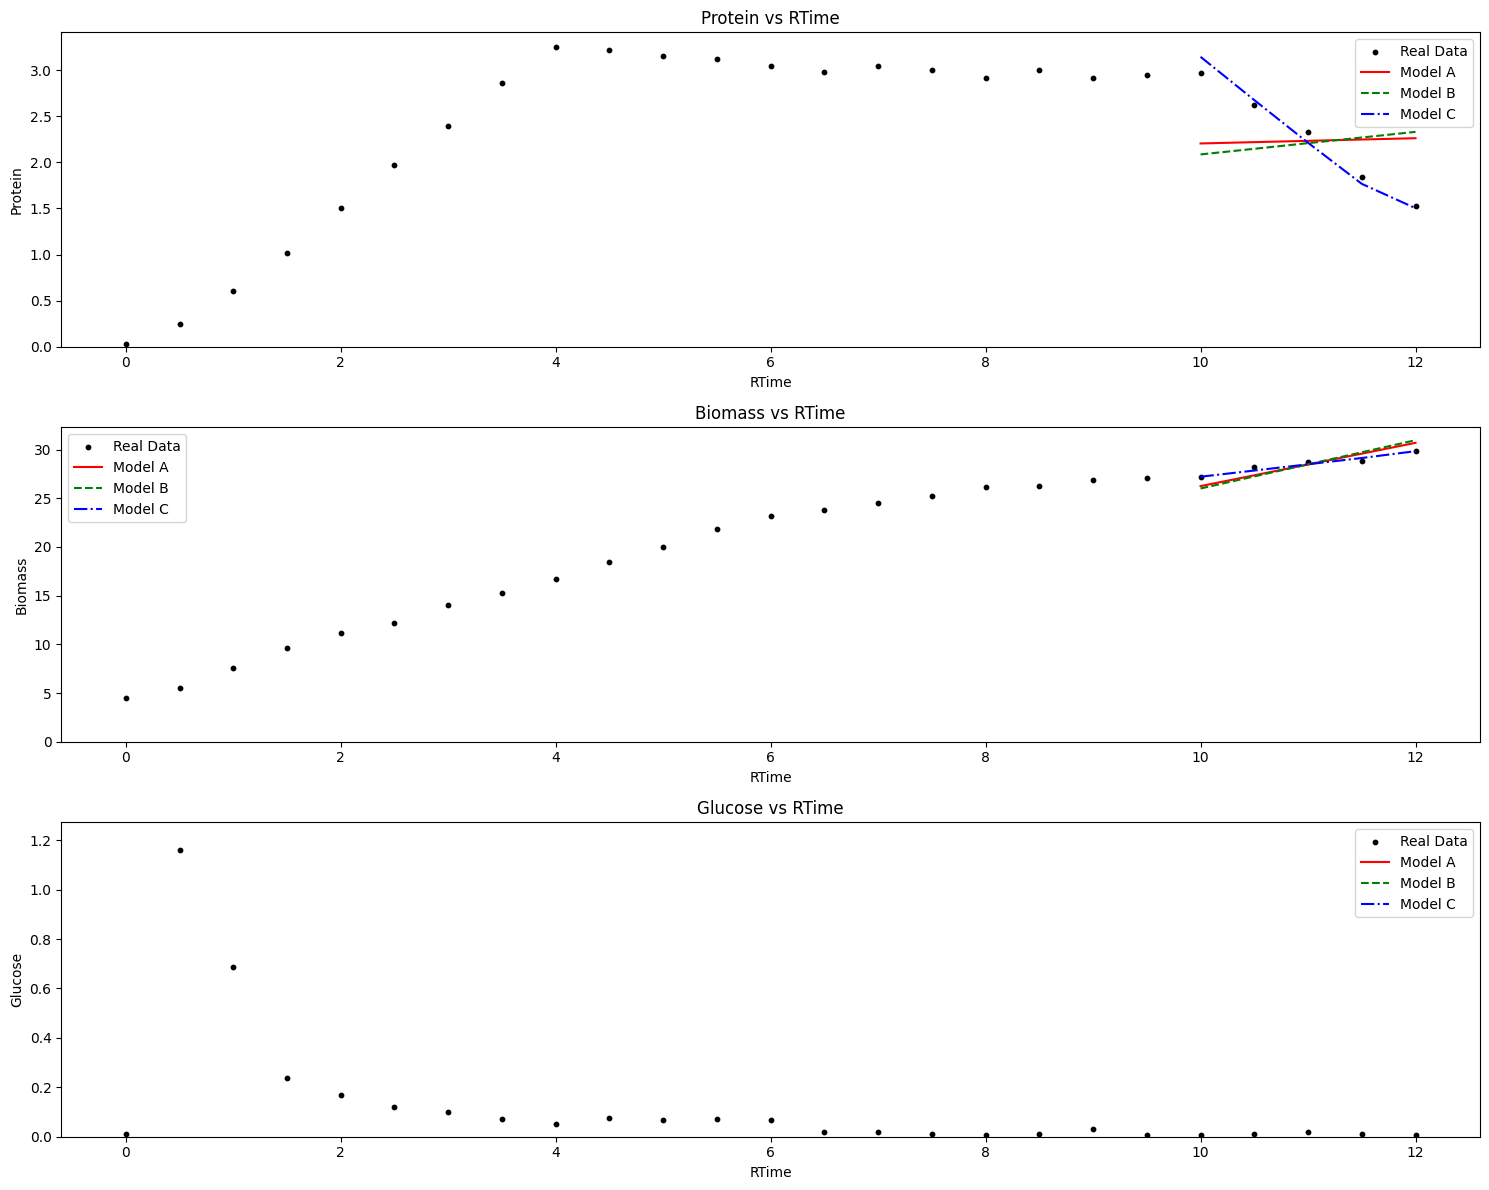

In [37]:
net_A, net_B, net_C, u_pred_A, u_pred_B, u_pred_C, full_df, train_df = get_results(FIRST, LAST)
get_params(net_A, net_B, net_C)
get_errors(u_pred_A, u_pred_B, u_pred_C, train_df)
plot_results(u_pred_A, u_pred_B, u_pred_C, train_df, full_df)

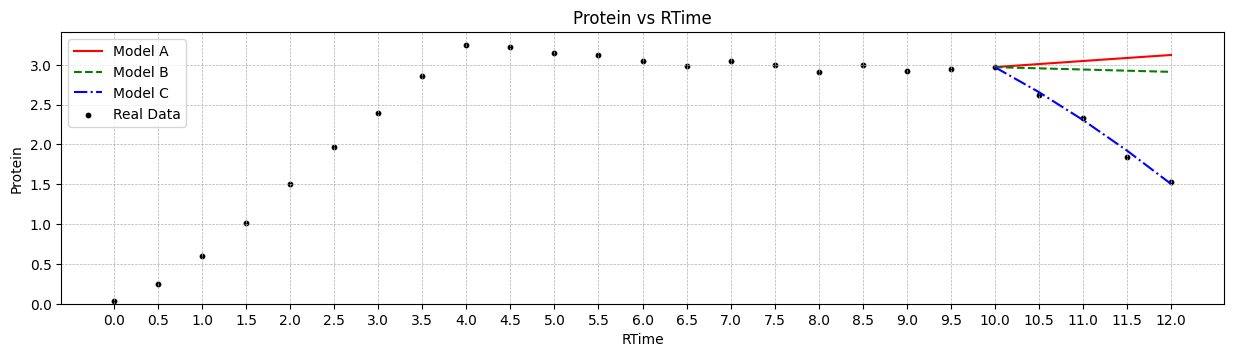

In [38]:
from system_ode import Fs, S_IN, Rg, MU_MAX, K_S, Y_XS
from scipy.integrate import odeint

X0, S0, P0, V0 = train_df['Biomass'].values[0], \
    train_df['Glucose'].values[0], \
    train_df['Protein'].values[0], \
    train_df['V'].values[0]
    
IC = [X0, S0, P0, V0]
dt = 0.5
t_start = train_df['RTime'].values[0]
t_end = train_df['RTime'].values[-1] + dt
t_sim = np.arange(t_start, t_end, dt)

def model_A(t: float, alpha: float):
    return alpha * 1 / (1 + np.exp(-t))

def model_B(t: float, alpha: float):
    return alpha * np.exp(-t)

def model_C(t: float, alpha: float, beta: float):
    return alpha - beta * t

def simulate(model: str, alpha: float, beta: float = None) -> np.ndarray:
    # differential equations
    def SystemODE(x, t):
        X, S, P, V = x
        dX = -Fs(t) * X / V + Rg(X, S, MU_MAX, K_S)
        if model == 'A':
            dP = -Fs(t) * P / V + model_A(t, alpha) * Rg(X, S, MU_MAX, K_S)
        elif model == 'B':
            dP = -Fs(t) * P / V + model_B(t, alpha) * Rg(X, S, MU_MAX, K_S)
        elif model == 'C':
            dP = -Fs(t) * P / V + model_C(t, alpha, beta) * Rg(X, S, MU_MAX, K_S)
        else:
            raise ValueError('Model not found')
        dS = Fs(t) * (S_IN - S) / V - Rg(X, S, MU_MAX, K_S) / Y_XS
        dV = Fs(t)
        return [dX, dS, dP, dV]
    sol = odeint(SystemODE, IC, t_sim)
    return sol.transpose()

sol_A = simulate('A', net_A.alpha.item())
sol_B = simulate('B', net_B.alpha.item())
sol_C = simulate('C', net_C.alpha.item(), net_C.beta.item())

plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)
plt.plot(t_sim, sol_A[2], linestyle='-', color='r', label='Model A')
plt.plot(t_sim, sol_B[2], linestyle='--', color='g', label='Model B')
plt.plot(t_sim, sol_C[2], linestyle='-.', color='b', label='Model C')
plt.scatter(full_df['RTime'], full_df['Protein'], color='black', s=10, label='Real Data')
plt.xlabel('RTime')
plt.ylabel('Protein')
plt.title('Protein vs RTime')
plt.xticks(np.arange(0, 12.5, 0.5))
plt.ylim(bottom=0)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()